In [3]:
import sys
sys.path.insert(1, '/home/msantolaria/Documents/MyPythonLibrary/ClimAnag/')
import climbasis as climb
from climbasis import *
import domain as dom
import myplot
import glob
from myplot import *

# In[3]:


source='/home/msantolaria/Documents/MyResearch/GabiSAM/UBSam/'
resultsDir=source + 'Results/'
plotsDir=source + 'Plots/'


#resultsDir='/media/maria/MARIAEXT2/WinterTrendsObs/'
sourceData='/home/msantolaria/Documents/Data/eraint/'


In [55]:
# Opening files
variable2='wind'
data2='eraint'
filenameu = sourceData+'u925.mon.eraint_197901_201512.nc'
filenamev = sourceData+'v925.mon.eraint_197901_201512.nc'
#filenameu = sourceData+'u850_mon_eraint_1979-2015_shiftgrid.nc'
#filenamev= sourceData+'v850_mon_eraint_1979-2015_shiftgrid.nc'

dsu0 = xr.open_dataset(filenameu)['u']
dsu0 = dsu0.assign_coords(longitude=(((dsu0.longitude + 180) % 360) - 180))
dsu = dsu0.roll(longitude=int(len(dsu0['longitude']) / 2), roll_coords=True)

dsv0 = xr.open_dataset(filenamev)['v']
dsv0 = dsv0.assign_coords(longitude=(((dsv0.longitude + 180) % 360) - 180))
dsv = dsv0.roll(longitude=int(len(dsv0['longitude']) / 2), roll_coords=True)


lat,lon=climb.latlon(dsu)
ylat=dsu.coords['latitude']
xlon=dsu.coords['longitude']

fieldu=dsu.sel(latitude=slice(-20,-90),longitude=slice(-170,-10))
fieldv=dsv.sel(latitude=slice(-20,-90),longitude=slice(-170,-10))

In [56]:
units=dsu.units
print(units)

m s**-1


In [57]:
season='DJF'
valsu,anomsu=climb.seasonal_selection(fieldu,season,1980,2015)
valsv,anomsv=climb.seasonal_selection(fieldv,season,1980,2015)

(D- 1980  JF- 1981  to D- 2014 JF- 2015
(D- 1980  JF- 1981  to D- 2014 JF- 2015


In [58]:
climu=valsu.mean('time')
climv=valsv.mean('time')
clim0=0*climu

In [59]:
rList=[climu,climv]
subdomain='SHWest'
domain='SHWest'
seasons=['DJF']

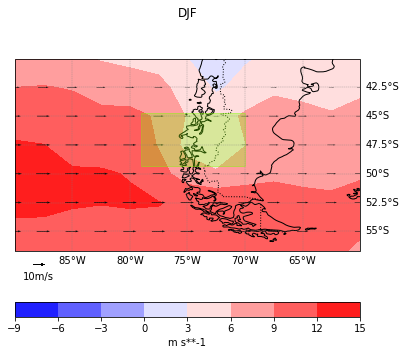

In [53]:

#------------------------------------
clevsT=np.arange(-1.0,1.1,0.1)
#color='PiYG'
color='bwr'
exp='obs'
decomp='original'
i=0
lat,lon=climb.latlon(rList[i])
#figtrend=myplot.oneplot_rvalue(variable=variable, decomp=decomp, exp=exp, model=model, clevs=clevsT, units=units, subdomain=subdomain, par=par, xlon=par[0][lon], ylat=par[0][lat], season=season, iyr=iyr, fyr=fyr,extent=mapa)

latS,latN,lonW,lonE,latlim,lonlim=dom.coord_domain(subdomain)
fig,axs= plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(8,10))

lons, lats = np.meshgrid(rList[i][lon],rList[i][lat])

CS1=axs.contourf(lons,lats, rList[i][:,:],
                transform=ccrs.PlateCarree(),
                cmap=color,extent='both')

 # Add arrows to show the wind vectors
Q1=plt.quiver(lons,lats, climu, clim0, pivot='middle', 
                     transform=ccrs.PlateCarree(),
        angles="xy",
        scale_units="xy",
        scale=10,color='black',
        minshaft=4,
        minlength=0.1,
        width=0.1)
# Normalise the data for uniform arrow size
#u_norm = u / np.sqrt(u ** 2.0 + v ** 2.0)
#v_norm = v / np.sqrt(u ** 2.0 + v ** 2.0)
#plt.quiver(x, y, u_norm, v_norm, pivot='middle', transform=transform)
#plt.quiverkey(Q1, 1.2, 0.515, 2, 'arrow 1', coordinates='data')
plt.quiverkey(Q1,                      #Incoming quiver handle
              X=0.07, Y = -0.07,       #Determine the location of label, all limited to [0,1]
              U = 10,                    #Reference arrow length means the wind speed is 5m/s.
             angle = 0,            #Reference arrow placement angle. The default is 0,
             label='10m/s',        #Arrow's supplement: label's content + 
             labelpos='S',          #label is in which direction of the reference arrow; S means south
             color = 'black',labelcolor = 'black')
#levels=[0,0.1,1.0]
#cs = axs.contourf(lons,lats,pList[i][:,:], transform=ccrs.PlateCarree(),levels=levels,
#                hatches=["+", ""], alpha=0.)
    # Draw the coastines for each subplot
axs.coastlines()
axs.add_feature(cfeature.BORDERS, linestyle=':', alpha=1)
    #axs.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='None', facecolor='None'))
#axs.set_extent([lonW, lonE, latS,latN])
axs.set_extent([-90, -60, -56,-40])
        # Longitude and latitude labels
gl = axs.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.4, color='grey', alpha=0.8, linestyle='--')
gl.top_labels = False
gl.left_labels = False
gl.xlines = True
gl.ylines = True
#gl.xlocator = mticker.FixedLocator([-180,-10])
#gl.ylocator = mticker.FixedLocator([-20,-90])
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()
#gl.xlim(80, 120)
#gl.xlabel_style = {'size': 15, 'color': 'gray'}
#gl.xlabel_style = {'color': 'red', 'weight': 'bold'}
    # Adjust the location of the subplots on the page to make room for the colorbar
geom = geometry.box(minx=-79,maxx=-70,miny=-44.7,maxy=-49.3)
axs.add_geometries([geom], facecolor='chartreuse',edgecolor='chartreuse',crs=ccrs.PlateCarree(), alpha=0.3)
fig.subplots_adjust(bottom=0.35, top=0.7, left=0.20, right=0.80,
                    wspace=0.05, hspace=0.5)
    # Add a colorbar axis at the bottom of the graph
    #([xmin,ymin,dx,dy])
cbar_ax = fig.add_axes([0.2, 0.3, 0.6, 0.02])
    # Draw the colorbar
cbar=fig.colorbar(CS1, cax=cbar_ax,orientation='horizontal',label='%s'%(units))
    ## Add a big title at the top
plt.suptitle('%s'%(seasons[i]),y=0.73)

plt.show()